    Discount       Price IntraPortfolioCannibalization_Yes  \
0  43.861239   17.508567                        -89.778974   
1  43.861239   -13.66694                        -89.778974   
2  43.861239 -189.657709                        -89.778974   
3 -64.438117   14.491583                         79.615317   
4  43.861239  209.589921                        -89.778974   

  PantryLoadingEffect_Yes  
0               18.159932  
1               18.159932  
2               18.159932  
3               18.159932  
4               18.159932  


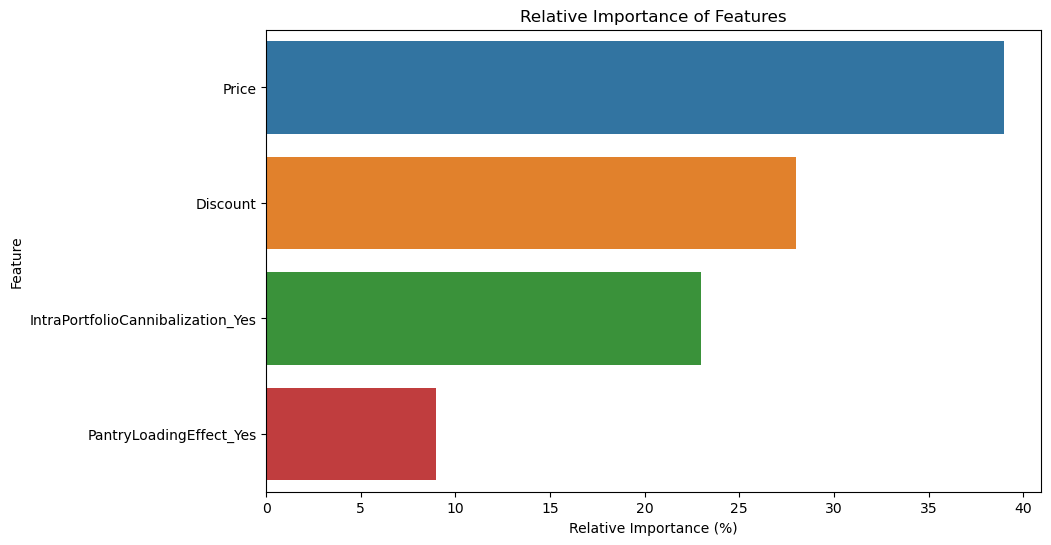

In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the data and preprocess
file_path = r"C:\Users\DURGA BHAVANI\Downloads\RegressionModel2.csv"
data = pd.read_csv(file_path)

# Data preprocessing
data['Discount'] = data['Discount'].str.rstrip('%').astype('float') / 100
data = data.drop(columns=['Week'])

# Group by product and compute differences
total_sales_per_product = data.groupby('Product')['Price'].sum().reset_index()
total_sales_per_product['Difference'] = total_sales_per_product['Price'].diff()

# Merge and clean data
data = data.merge(total_sales_per_product[['Product', 'Difference']], on='Product')
data = data.dropna(subset=['Difference'])
data = pd.get_dummies(data, columns=['IntraPortfolioCannibalization', 'PantryLoadingEffect'], drop_first=True)

X = data[['Discount', 'Price', 'IntraPortfolioCannibalization_Yes', 'PantryLoadingEffect_Yes']]
y = data['Difference']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Calculate Shapley Values using SHAP with the updated masker approach
masker = shap.maskers.Independent(X_train)  # Use Independent masker
explainer = shap.LinearExplainer(model, masker)
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values, columns=X_test.columns)
print(shap_values_df.head())

# Visualization for Relative Importance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
standardized_model = LinearRegression()
standardized_model.fit(X_train_scaled, y_train)
standardized_coefficients = standardized_model.coef_

# Convert the relative importance to percentages
relative_importance = abs(standardized_coefficients) / sum(abs(standardized_coefficients)) * 100
relative_importance = relative_importance.astype(int)  # Convert to integer
relative_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Relative Importance (%)': relative_importance
})

# Plot Relative Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Relative Importance (%)', y='Feature', data=relative_importance_df.sort_values(by='Relative Importance (%)', ascending=False))
plt.title('Relative Importance of Features')
plt.show()


Mean Absolute SHAP Values for each feature:
 Discount                              86.774859
Price                                134.333754
IntraPortfolioCannibalization_Yes     85.967603
PantryLoadingEffect_Yes               28.980225
dtype: object

Sum of SHAP Values for each feature:
 Discount                             1104.653435
Price                                1521.968168
IntraPortfolioCannibalization_Yes   -1050.244603
PantryLoadingEffect_Yes              -105.932936
dtype: object


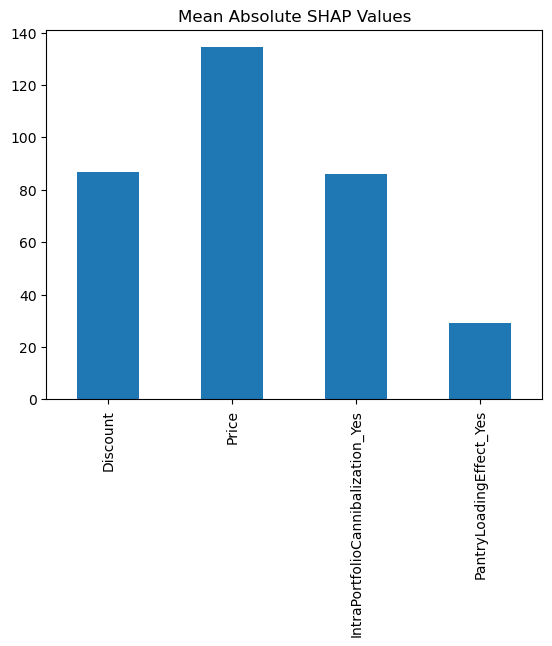

In [2]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the data and preprocess
file_path = r"C:\Users\DURGA BHAVANI\Downloads\RegressionModel2.csv"
data = pd.read_csv(file_path)

# Data preprocessing
data['Discount'] = data['Discount'].str.rstrip('%').astype('float') / 100
data = data.drop(columns=['Week'])

# Group by product and compute differences
total_sales_per_product = data.groupby('Product')['Price'].sum().reset_index()
total_sales_per_product['Difference'] = total_sales_per_product['Price'].diff()

# Merge and clean data
data = data.merge(total_sales_per_product[['Product', 'Difference']], on='Product')
data = data.dropna(subset=['Difference'])
data = pd.get_dummies(data, columns=['IntraPortfolioCannibalization', 'PantryLoadingEffect'], drop_first=True)

X = data[['Discount', 'Price', 'IntraPortfolioCannibalization_Yes', 'PantryLoadingEffect_Yes']]
y = data['Difference']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Calculate Shapley Values using SHAP with the updated masker approach
masker = shap.maskers.Independent(X_train)  # Use Independent masker
explainer = shap.LinearExplainer(model, masker)
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = shap_values_df.abs().mean()

# Calculate the sum of SHAP values for each feature
sum_shap_values = shap_values_df.sum()

# Display the aggregated SHAP values
print("Mean Absolute SHAP Values for each feature:\n", mean_abs_shap_values)
print("\nSum of SHAP Values for each feature:\n", sum_shap_values)

# If you want to visualize the mean absolute SHAP values:
mean_abs_shap_values.plot(kind='bar', title='Mean Absolute SHAP Values')
plt.show()
